###### PipeLines & Grid Search
Building powerful models is all about feature engineering and hyperparameter optimization. If we are going to efficiently iterate through many different models we need to automate the process of trying hyperparameters and evaluating the result. As you will see sklearn Pipelines are a powerful paradigm for doing just that.   

Pipelines allow you, the researcher, to chain many feature engineering steps together, (along with your sklearn estimator) and optimize your models using GridSearchCV automatically!     

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, model_selection, linear_model, preprocessing, pipeline, metrics

import matplotlib.pyplot as plt

%matplotlib inline

Frist we will read in the standard Boston Housing Price dataset. Details of this dataset are not particularly important for our purposes, but we are basically using Regression to predict the value of a home in Boston given details about the home itself and it’s neighborhood .    

In [4]:
dset = datasets.load_boston()

df = pd.DataFrame(data=dset.data, columns= dset.feature_names)
df['y'] = dset.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#Preform a train test split
df_train, df_test = model_selection.train_test_split(df,test_size=0.1)

This time lets try to do some feature engineering on our data. First lets normalize our inputs using a StandardScaler. Then we can create some PolynomialFeatures in case any of the relations are non-linear. Then we can fit with our regressor. 

In [7]:
norm = preprocessing.StandardScaler(with_mean=True, with_std=True)

poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=True)

regresor = linear_model.ElasticNet(alpha=1.0 )

Finding the right hyperparamters for all of these stages will be a lot of work and error prone.

Now the magic: we can chain these operations into a 'pipeline' that acts as a single estimator, running normalization, polynomial feature engineering and repressor automatically after every call to fit or fit_transform. Look around at the pipeline module in sklearn before proceeding.

In [8]:
model = pipeline.Pipeline([ ('norm', norm),
                            ('poly',poly),
                            ('regresor', regresor)])

The best part: With a pipeline in hand we can now preform a cross validated grid search for the optimal hyper parameters in each stage of our ML pipeline. 

In [9]:
grid = {'norm__with_mean':[True, False],
        'poly__degree':[1,2,3],
        'regresor__alpha':[0.001,0.01,0.1,1,10]}

gs = model_selection.GridSearchCV( estimator=model,
                                   param_grid= grid,
                                   cv = 3,
                                   scoring= metrics.make_scorer(metrics.r2_score)
                                )

In [10]:
tar_cols = [c for c in df_test.columns if c!='y']

fit_model = gs.fit(df_train[tar_cols], df_train['y'])

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [190]:
best_model = gs.best_estimator_

best_model.score(df_test[tar_cols], df_test['y'])

0.82423027604112609

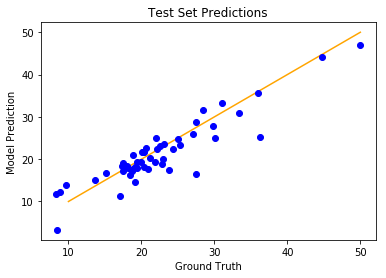

In [189]:
xs = np.arange(10,50,0.01)
preds = fit_model.best_estimator_.predict(df_test[tar_cols])
#plt.xlim([10,50])
plt.plot(xs,xs,'orange')
plt.plot(df_test['y'],preds,'bo')
plt.ylabel('Model Prediction')
plt.xlabel('Ground Truth')
plt.title('Test Set Predictions')
plt.show()